# Graduated Rotational Internship Program: The Sparks Foundation



## Data Science & Analytics Intern

### Author: Sharayu M. Chikode

## TASK 1: Prediction using Supervised ML



### Problem Statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



### To predict:

What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing all libraries

In [7]:
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Libraries imported successfully.")

Libraries imported successfully.


## Reading all the data from Online source

In [12]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported successfully.")
df

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [14]:
#checking for any missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
#checking the correlation between hours and scores

df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [18]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


The correlation between number of study hours and scores is 0.971891 

Their is a positive relationship between no. of study hours and scores.

### Linear Regression

1) Linear regression is a supervised learning algorithm used when target ? dependent variable continues real number.


2) It establishes relationship between dependent variable y and one or more independent variable x using fit line.

## Data Visualization

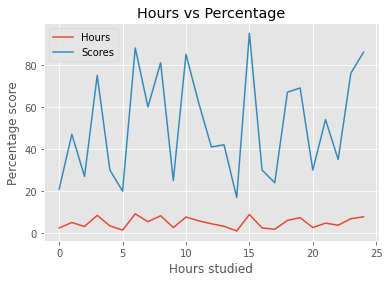

In [19]:
#visulizing with line plot

plt.style.use('ggplot')
df.plot(kind="line")
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

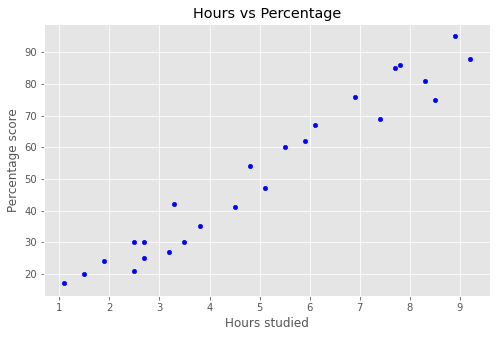

In [24]:
#visulizing with scatter plot

df.plot(kind="scatter",x="Hours",y="Scores",color="b",figsize=(8,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

By visualizing we come to know that this problemcan be easily solved by linear regression.

## Modelling the data

In [31]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

#using train test split to split the data in train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

regressor=LinearRegression()
regressor.fit(train_x,train_y)

print("Training completed")
print("Coefficients:",regressor.coef_)
print("Intercept",regressor.intercept_)
 

Training completed
Coefficients: [9.94061514]
Intercept 1.5079104828268726


In [37]:
#using metrics to find mean absolute eroor and r2 to see the accuracy

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print("Mean Absolute Error:{}".format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2 score: %.2f"%r2_score(y_pred,test_y))

Mean Absolute Error:4.877039354964484
R2 score: 0.98


1) Error value is very less i.e 4.87


2) R squared score is 0.98 i.e. our more is predicting 98% of the data.

In [38]:
# Comparing actual vs predicted 

df2=pd.DataFrame({'Actual':test_y,'Predicted':y_pred})
df2

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


### Therefore, what will be predicted score if a student studies for 9.25 hrs/ day?

In [42]:
hours=9.25
predicted_score=regressor.predict([[hours]])

print(f'No of hours= {hours}')
print(f'Predicted score= {predicted_score[0]}')


No of hours= 9.25
Predicted score= 93.45860055685799
